In [1]:
!pip install ucimlrepo seaborn matplotlib scikit-learn xgboost pandas_profiling


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
from pprint import pprint
  
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 

# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 

In [3]:
# metadata 
pprint(energy_efficiency.metadata)  

{'abstract': 'This study looked into assessing the heating load and cooling '
             'load requirements of buildings (that is, energy efficiency) as a '
             'function of building parameters.',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'We perform energy analysis using 12 different '
                                'building shapes simulated in Ecotect. The '
                                'buildings differ with respect to the glazing '
                                'area, the glazing area distribution, and the '
                                'orientation, amongst other parameters. We '
                                'simulate various settings as functions of 

In [4]:
# variable information 
pprint(energy_efficiency.variables)

  name     role        type demographic                description units  \
0   X1  Feature  Continuous        None       Relative Compactness  None   
1   X2  Feature  Continuous        None               Surface Area  None   
2   X3  Feature  Continuous        None                  Wall Area  None   
3   X4  Feature  Continuous        None                  Roof Area  None   
4   X5  Feature  Continuous        None             Overall Height  None   
5   X6  Feature     Integer        None                Orientation  None   
6   X7  Feature  Continuous        None               Glazing Area  None   
7   X8  Feature     Integer        None  Glazing Area Distribution  None   
8   Y1   Target  Continuous        None               Heating Load  None   
9   Y2   Target  Continuous        None               Cooling Load  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7          

In [5]:
import pandas as pd
df = pd.concat([X, y], axis=1)

In [6]:
pprint(df.info())
pprint(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.00000

In [7]:
pprint(df.isnull().sum())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


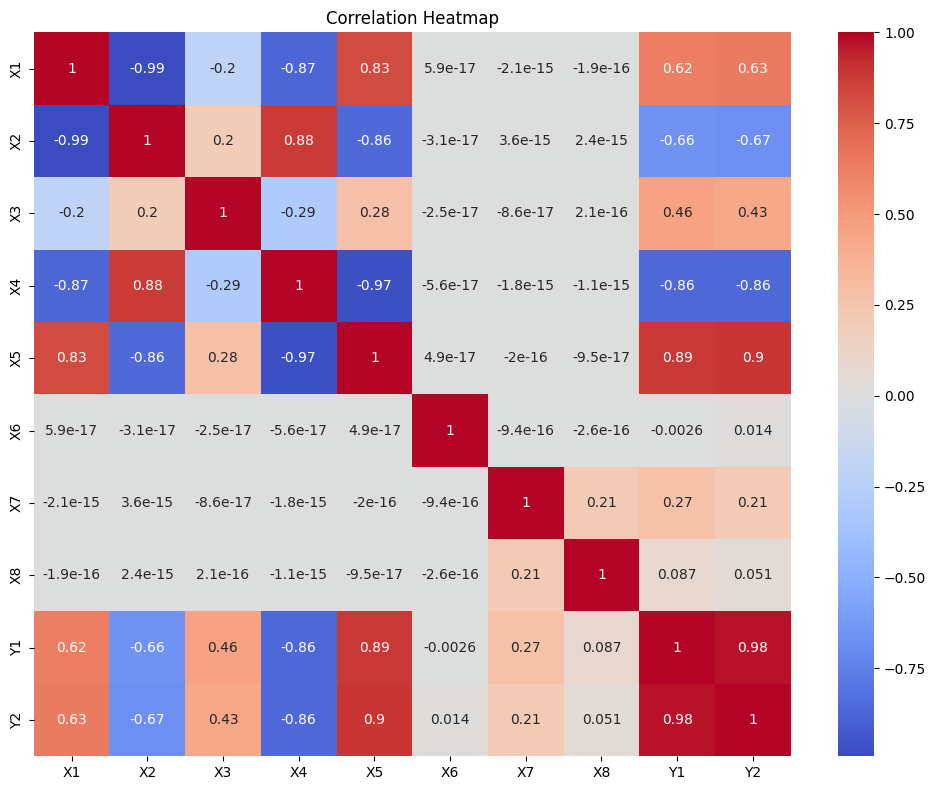

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

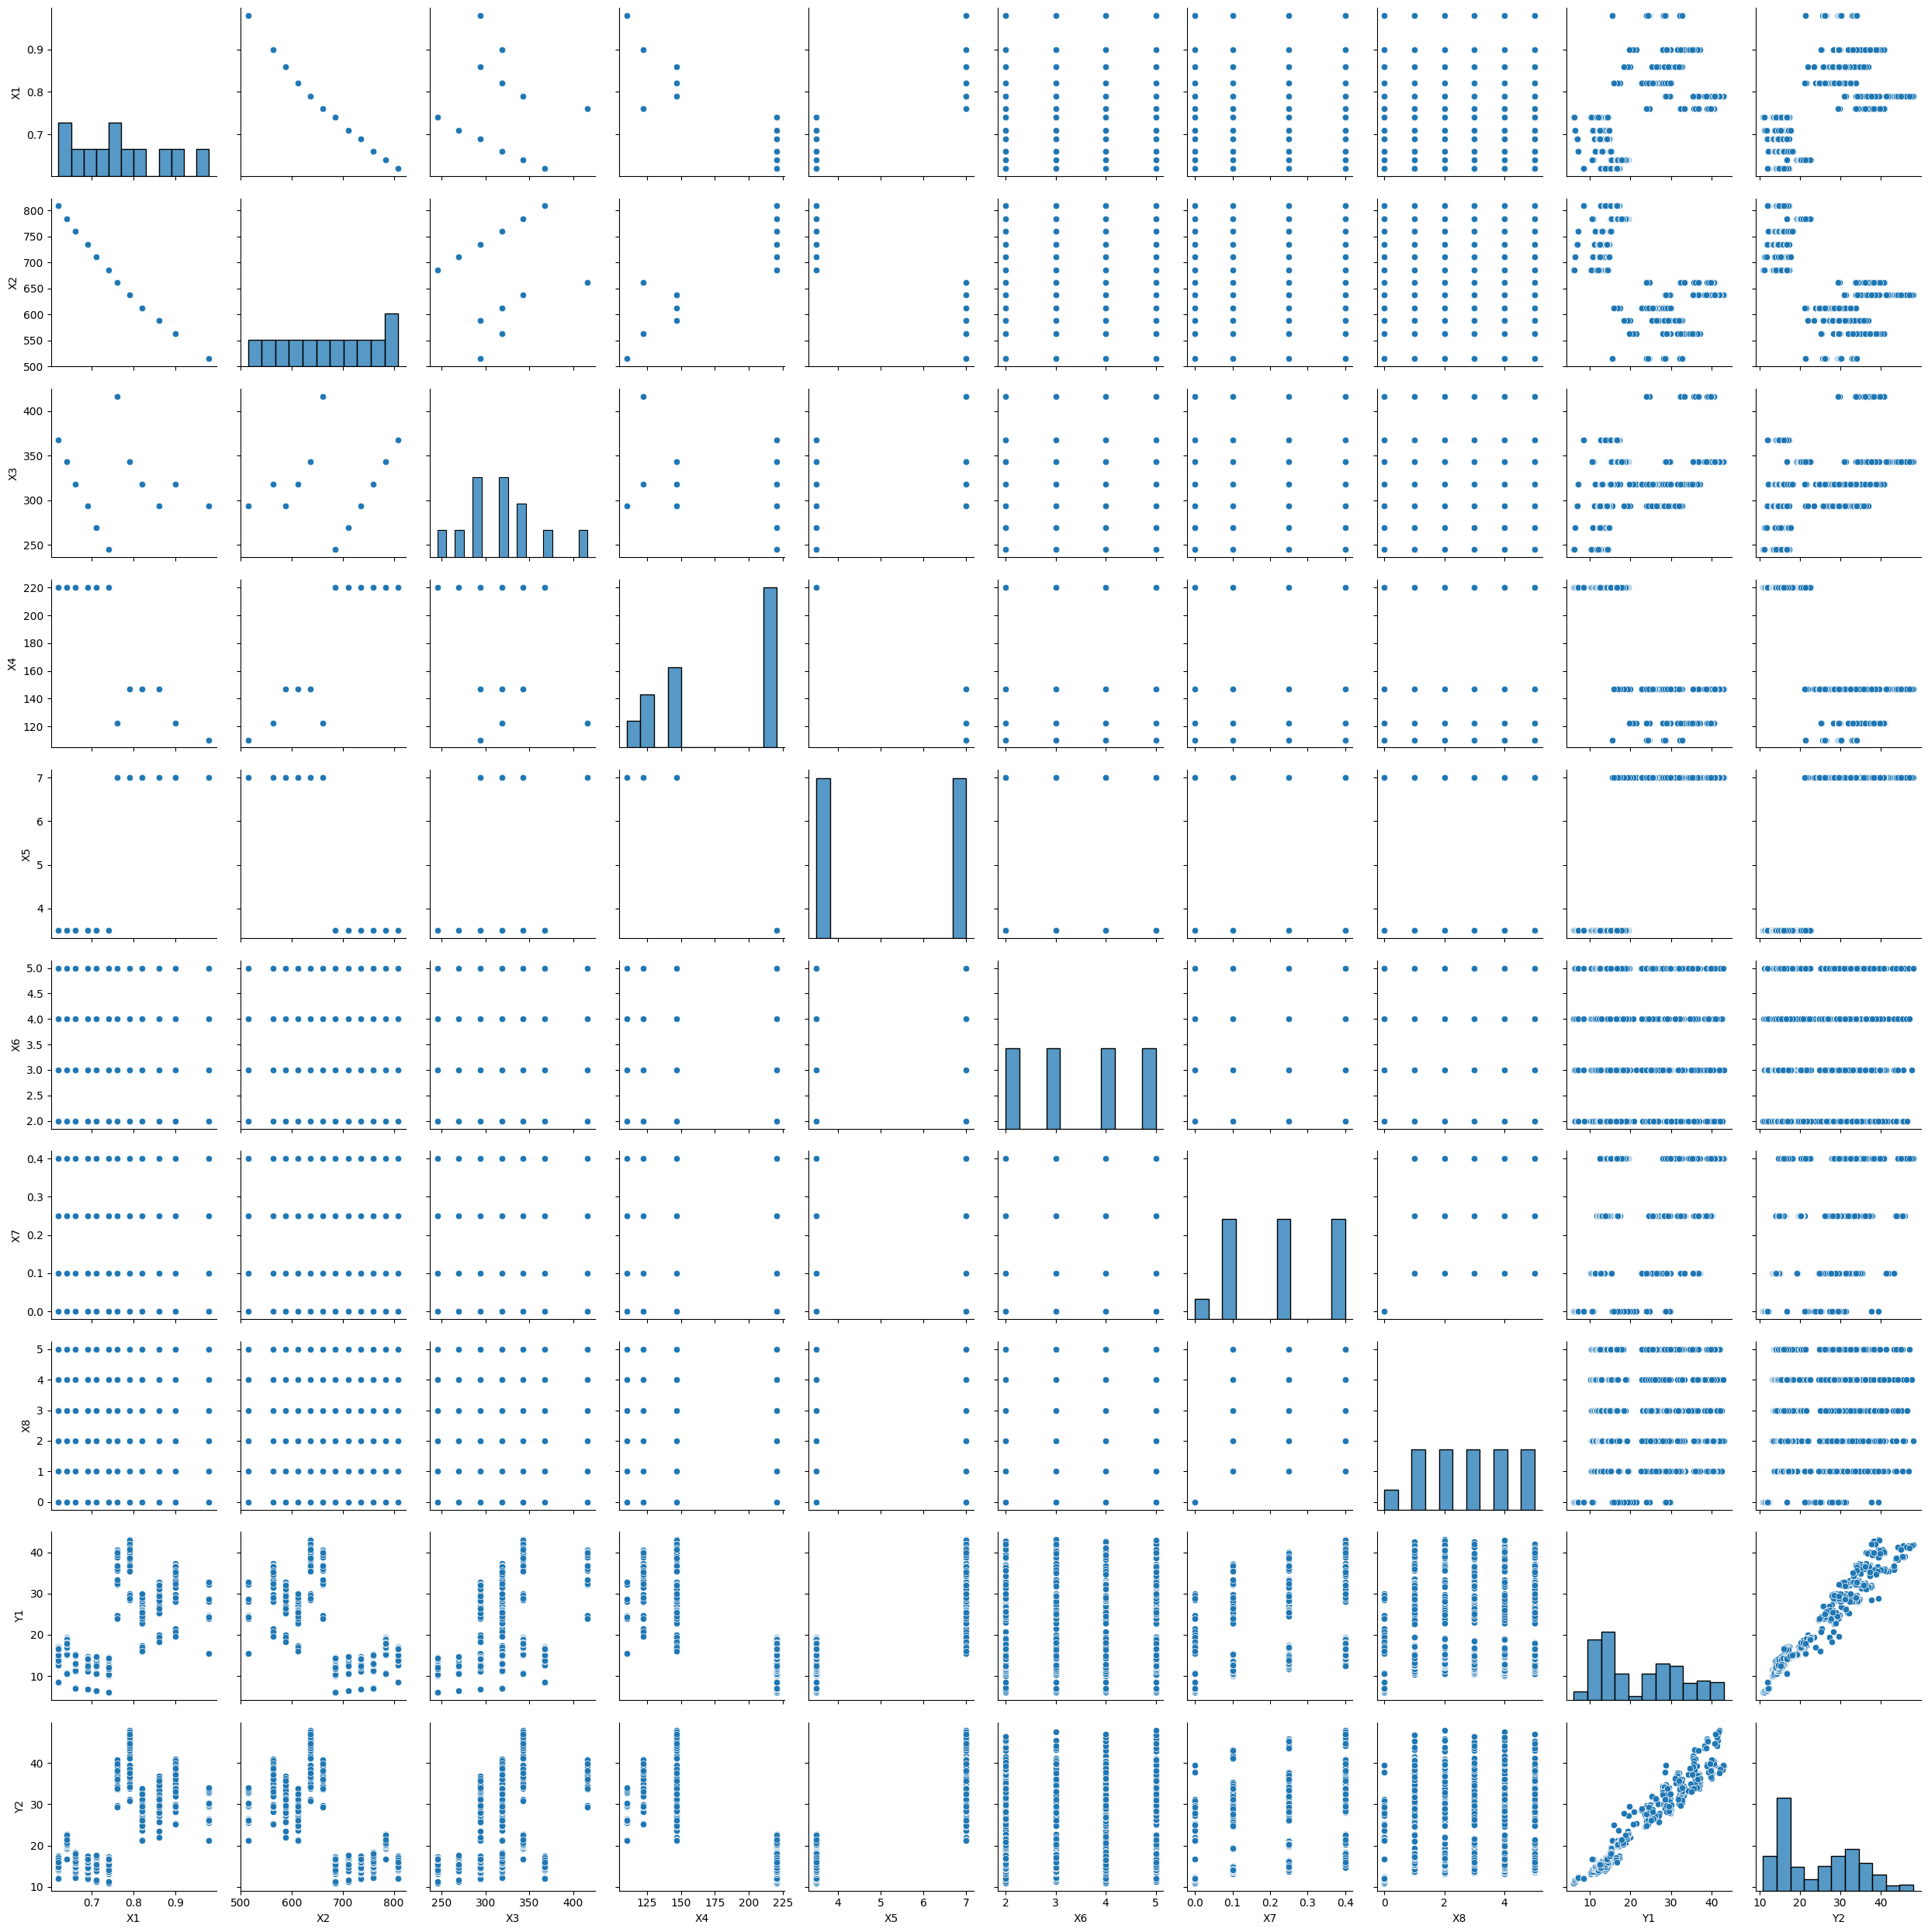

In [9]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Prepare the data
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = []

for name, base_model in models.items():
    # Use MultiOutputRegressor for models that don't support multi-output natively
    if name != "Random Forest":
        model = MultiOutputRegressor(base_model)
    else:
        model = base_model

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred, multioutput='raw_values')

    results.append({
        "Model": name,
        "MSE": round(mse, 2),
        "R2_Y1 (Heating Load)": round(r2[0], 2),
        "R2_Y2 (Cooling Load)": round(r2[1], 2)
    })

# Show results
results_df = pd.DataFrame(results)
print(results_df)


                      Model    MSE  R2_Y1 (Heating Load)  R2_Y2 (Cooling Load)
0         Linear Regression   9.52                  0.91                  0.89
1             Random Forest   1.94                  1.00                  0.96
2         Gradient Boosting   1.28                  1.00                  0.98
3  Support Vector Regressor  30.31                  0.69                  0.69
4                   XGBoost   0.45                  1.00                  0.99


In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Energy Efficiency Dataset EDA Report")
profile.to_file("../reports/energy_efficiency_eda.html")

/Users/shraddhasharma/Desktop/projects/ucimlrepo/ucimlvenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:   0%|                                                                                         | 0/5 [00:00<?, ?it/s]

Summarize dataset:   0%|                                                                 | 0/15 [00:00<?, ?it/s, Describe variable: X1]

Summarize dataset:   0%|                                                                 | 0/15 [00:00<?, ?it/s, Describe variable: X3]

Summarize dataset:   0%|                                                                 | 0/15 [00:00<?, ?it/s, Describe variable: X8]

Summarize dataset:   7%|███▊                                                     | 1/15 [00:00<00:00, 78.19it/s, Describe variable: Y1]

Summarize dataset:   7%|███▊                                                     | 1/15 [00:00<00:00, 68.28it/s, Describe variable: Y1]

Summarize dataset:   7%|███▊                                                     | 1/15 [00:00<00:00, 63.73it/s, Describe variable: Y1]

Summarize dataset:   7%|███▊                                                     | 1/15 [00:00<00:00, 59.25it/s, Describe variable: Y1]

Summarize dataset:  20%|███████████▍                                             | 3/15 [00:00<00:00, 98.40it/s, Describe variable: Y2]

Summarize dataset:  20%|███████████▍                                             | 3/15 [00:00<00:00, 86.03it/s, Describe variable: Y2]

Summarize dataset:  20%|███████████▍                                             | 3/15 [00:00<00:00, 84.25it/s, Describe variable: Y2]

  0%|                                                                                                           | 0/10 [00:00<?, ?it/s]

Summarize dataset:  33%|███████████████████                                      | 5/15 [00:00<00:00, 24.16it/s, Describe variable: Y2]

Summarize dataset:  40%|██████████████████████▊                                  | 6/15 [00:00<00:00, 20.26it/s, Describe variable: Y2]

 40%|███████████████████████████████████████▌                                                           | 4/10 [00:00<00:00, 11.07it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.61it/s]


Summarize dataset:  67%|███████████████████████████████████████▎                   | 10/15 [00:00<00:00, 20.26it/s, Get variable types]

Summarize dataset:  69%|████████████████████████████████████▍                | 11/16 [00:00<00:00, 20.26it/s, Get dataframe statistics]

Summarize dataset:  71%|████████████████████████████████████               | 12/17 [00:00<00:00, 20.26it/s, Calculate auto correlation]

Summarize dataset:  76%|███████████████████████████████████████            | 13/17 [00:00<00:00, 28.88it/s, Calculate auto correlation]

Summarize dataset:  76%|█████████████████████████████████████████████              | 13/17 [00:00<00:00, 28.88it/s, Get scatter matrix]

Summarize dataset:  25%|███████████████▍                                               | 13/53 [00:00<00:01, 28.88it/s, scatter X1, X1]

Summarize dataset:  26%|████████████████▋                                              | 14/53 [00:00<00:01, 28.88it/s, scatter X2, X1]

Summarize dataset:  28%|█████████████████▊                                             | 15/53 [00:00<00:01, 28.88it/s, scatter X3, X1]

Summarize dataset:  30%|███████████████████                                            | 16/53 [00:00<00:01, 28.88it/s, scatter X8, X1]

Summarize dataset:  32%|████████████████████▏                                          | 17/53 [00:00<00:01, 20.27it/s, scatter X8, X1]

Summarize dataset:  32%|████████████████████▏                                          | 17/53 [00:00<00:01, 20.27it/s, scatter Y1, X1]

Summarize dataset:  34%|█████████████████████▍                                         | 18/53 [00:00<00:01, 20.27it/s, scatter Y2, X1]

Summarize dataset:  36%|██████████████████████▌                                        | 19/53 [00:00<00:01, 20.27it/s, scatter X1, X2]

Summarize dataset:  38%|███████████████████████▊                                       | 20/53 [00:00<00:01, 21.79it/s, scatter X1, X2]

Summarize dataset:  38%|███████████████████████▊                                       | 20/53 [00:00<00:01, 21.79it/s, scatter X2, X2]

Summarize dataset:  40%|████████████████████████▉                                      | 21/53 [00:00<00:01, 21.79it/s, scatter X3, X2]

Summarize dataset:  42%|██████████████████████████▏                                    | 22/53 [00:00<00:01, 21.79it/s, scatter X8, X2]

Summarize dataset:  43%|███████████████████████████▎                                   | 23/53 [00:01<00:01, 23.15it/s, scatter X8, X2]

Summarize dataset:  43%|███████████████████████████▎                                   | 23/53 [00:01<00:01, 23.15it/s, scatter Y1, X2]

Summarize dataset:  45%|████████████████████████████▌                                  | 24/53 [00:01<00:01, 23.15it/s, scatter Y2, X2]

Summarize dataset:  47%|█████████████████████████████▋                                 | 25/53 [00:01<00:01, 23.15it/s, scatter X1, X3]

Summarize dataset:  49%|██████████████████████████████▉                                | 26/53 [00:01<00:01, 23.02it/s, scatter X1, X3]

Summarize dataset:  49%|██████████████████████████████▉                                | 26/53 [00:01<00:01, 23.02it/s, scatter X2, X3]

Summarize dataset:  51%|████████████████████████████████                               | 27/53 [00:01<00:01, 23.02it/s, scatter X3, X3]

Summarize dataset:  53%|█████████████████████████████████▎                             | 28/53 [00:01<00:01, 23.02it/s, scatter X8, X3]

Summarize dataset:  55%|██████████████████████████████████▍                            | 29/53 [00:01<00:00, 24.49it/s, scatter X8, X3]

Summarize dataset:  55%|██████████████████████████████████▍                            | 29/53 [00:01<00:00, 24.49it/s, scatter Y1, X3]

Summarize dataset:  57%|███████████████████████████████████▋                           | 30/53 [00:01<00:00, 24.49it/s, scatter Y2, X3]

Summarize dataset:  58%|████████████████████████████████████▊                          | 31/53 [00:01<00:00, 24.49it/s, scatter X1, X8]

Summarize dataset:  60%|██████████████████████████████████████                         | 32/53 [00:01<00:00, 25.07it/s, scatter X1, X8]

Summarize dataset:  60%|██████████████████████████████████████                         | 32/53 [00:01<00:00, 25.07it/s, scatter X2, X8]

Summarize dataset:  62%|███████████████████████████████████████▏                       | 33/53 [00:01<00:00, 25.07it/s, scatter X3, X8]

Summarize dataset:  64%|████████████████████████████████████████▍                      | 34/53 [00:01<00:00, 25.07it/s, scatter X8, X8]

Summarize dataset:  66%|█████████████████████████████████████████▌                     | 35/53 [00:01<00:00, 25.07it/s, scatter Y1, X8]

Summarize dataset:  68%|██████████████████████████████████████████▊                    | 36/53 [00:01<00:00, 26.79it/s, scatter Y1, X8]

Summarize dataset:  68%|██████████████████████████████████████████▊                    | 36/53 [00:01<00:00, 26.79it/s, scatter Y2, X8]

Summarize dataset:  70%|███████████████████████████████████████████▉                   | 37/53 [00:01<00:00, 26.79it/s, scatter X1, Y1]

Summarize dataset:  72%|█████████████████████████████████████████████▏                 | 38/53 [00:01<00:00, 26.79it/s, scatter X2, Y1]

Summarize dataset:  74%|██████████████████████████████████████████████▎                | 39/53 [00:01<00:00, 26.79it/s, scatter X3, Y1]

Summarize dataset:  75%|███████████████████████████████████████████████▌               | 40/53 [00:01<00:00, 27.76it/s, scatter X3, Y1]

Summarize dataset:  75%|███████████████████████████████████████████████▌               | 40/53 [00:01<00:00, 27.76it/s, scatter X8, Y1]

Summarize dataset:  77%|████████████████████████████████████████████████▋              | 41/53 [00:01<00:00, 27.76it/s, scatter Y1, Y1]

Summarize dataset:  79%|█████████████████████████████████████████████████▉             | 42/53 [00:01<00:00, 27.76it/s, scatter Y2, Y1]

Summarize dataset:  81%|███████████████████████████████████████████████████            | 43/53 [00:01<00:00, 27.85it/s, scatter Y2, Y1]

Summarize dataset:  81%|███████████████████████████████████████████████████            | 43/53 [00:01<00:00, 27.85it/s, scatter X1, Y2]

Summarize dataset:  83%|████████████████████████████████████████████████████▎          | 44/53 [00:01<00:00, 27.85it/s, scatter X2, Y2]

Summarize dataset:  85%|█████████████████████████████████████████████████████▍         | 45/53 [00:01<00:00, 27.85it/s, scatter X3, Y2]

Summarize dataset:  87%|██████████████████████████████████████████████████████▋        | 46/53 [00:01<00:00, 22.40it/s, scatter X3, Y2]

Summarize dataset:  87%|██████████████████████████████████████████████████████▋        | 46/53 [00:01<00:00, 22.40it/s, scatter X8, Y2]

Summarize dataset:  89%|███████████████████████████████████████████████████████▊       | 47/53 [00:01<00:00, 22.40it/s, scatter Y1, Y2]

Summarize dataset:  91%|█████████████████████████████████████████████████████████      | 48/53 [00:02<00:00, 22.40it/s, scatter Y2, Y2]

Summarize dataset:  92%|██████████████████████████████████████████████████████████▏    | 49/53 [00:02<00:00, 23.82it/s, scatter Y2, Y2]

Summarize dataset:  89%|███████████████████████████████████████████████████▋      | 49/55 [00:02<00:00, 23.82it/s, Missing diagram bar]

Summarize dataset:  91%|██████████████████████████████████████████████████     | 50/55 [00:02<00:00, 23.82it/s, Missing diagram matrix]

Summarize dataset:  93%|█████████████████████████████████████████████████████████████▏    | 51/55 [00:02<00:00, 23.82it/s, Take sample]

Summarize dataset:  95%|█████████████████████████████████████████████████████▉   | 52/55 [00:02<00:00, 23.82it/s, Detecting duplicates]

Summarize dataset:  96%|████████████████████████████████████████████████████████████████▌  | 53/55 [00:02<00:00, 23.82it/s, Get alerts]

Summarize dataset:  98%|████████████████████████████████████████████████████ | 54/55 [00:02<00:00, 23.82it/s, Get reproduction details]

Summarize dataset: 100%|████████████████████████████████████████████████████████████████████| 55/55 [00:02<00:00, 23.82it/s, Completed]

Summarize dataset: 100%|████████████████████████████████████████████████████████████████████| 55/55 [00:02<00:00, 25.99it/s, Completed]

Generate report structure:   0%|                                                                                 | 0/1 [00:00<?, ?it/s]

Generate report structure: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]

Generate report structure: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]

Render HTML:   0%|                                                                                               | 0/1 [00:00<?, ?it/s]

Render HTML: 100%|███████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]

Render HTML: 100%|███████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]

Export report to file:   0%|                                                                                     | 0/1 [00:00<?, ?it/s]

Export report to file: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 190.84it/s]

In [12]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html('../reports/energy_efficiency_sweetviz_report.html')

                                             |                                                             | [  0%]   00:00 -> (? left)

[Summarizing dataframe]                      |                                                             | [  0%]   00:00 -> (? left)

Feature: X1                                  |█████▏                                                   | [  9%]   00:00 -> (00:00 left)

Feature: X1                                  |██████████▎                                              | [ 18%]   00:00 -> (00:01 left)

Feature: X2                                  |██████████▎                                              | [ 18%]   00:00 -> (00:01 left)

Feature: X2                                  |███████████████▌                                         | [ 27%]   00:00 -> (00:01 left)

Feature: X3                                  |███████████████▌                                         | [ 27%]   00:00 -> (00:01 left)

Feature: X4                                  |████████████████████▋                                    | [ 36%]   00:00 -> (00:01 left)

Feature: X5                                  |█████████████████████████▉                               | [ 45%]   00:00 -> (00:00 left)

Feature: X5                                  |███████████████████████████████                          | [ 55%]   00:00 -> (00:00 left)

Feature: X6                                  |███████████████████████████████                          | [ 55%]   00:00 -> (00:00 left)

Feature: X7                                  |████████████████████████████████████▎                    | [ 64%]   00:00 -> (00:00 left)

Feature: X8                                  |█████████████████████████████████████████▍               | [ 73%]   00:00 -> (00:00 left)

Feature: X8                                  |██████████████████████████████████████████████▋          | [ 82%]   00:00 -> (00:00 left)

Feature: Y1                                  |██████████████████████████████████████████████▋          | [ 82%]   00:00 -> (00:00 left)

Feature: Y2                                  |███████████████████████████████████████████████████▊     | [ 91%]   00:00 -> (00:00 left)

Feature: Y2                                  |█████████████████████████████████████████████████████████| [100%]   00:00 -> (00:00 left)

Feature: Y2                                  |                                                             | [  0%]   00:00 -> (? left)

[Step 2/3] Processing Pairwise Features      |                                                             | [  0%]   00:00 -> (? left)

[Step 2/3] Processing Pairwise Features      |                                                             | [  0%]   00:00 -> (? left)

[Step 3/3] Generating associations graph     |                                                             | [  0%]   00:00 -> (? left)

Done! Use 'show' commands to display/save.   |                                                             | [  0%]   00:00 -> (? left)

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████████████████████| [100%]   00:00 -> (00:00 left)

Report ../reports/energy_efficiency_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
